In [9]:
import pandas as pd
import numpy as np

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df1 = pd.read_csv('professional_mental.csv')
df2 = pd.read_csv('student_mental.csv')

In [6]:
df2.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [14]:
df1.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Work Pressure',
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [8]:
df1.describe()

,Gender,Age,City,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,112595.000000,112595.000000,112595.000000,112595.000000,112595.000000,112595.000000,112595.000000,112595.000000,112595.000000,112595.000000,112595.000000,112595.000000,112595.000000,112595.000000
mean,0.548905,43.994494,13.962965,11.587548,2.998641,2.974333,2.465642,2.010507,11.082703,0.460109,6.029069,2.951516,0.500457,0.081744
std,0.497605,10.945613,8.523533,9.941046,1.405820,1.416196,1.123800,0.804541,7.812563,0.498408,3.856207,1.405155,0.500002,0.273976
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,38.000000,6.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,0.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,46.000000,13.000000,8.000000,3.000000,3.000000,2.000000,2.000000,10.000000,0.000000,6.000000,3.000000,1.000000,0.000000
75%,1.000000,53.000000,21.000000,18.000000,4.000000,4.000000,3.000000,3.000000,17.000000,1.000000,9.000000,4.000000,1.000000,0.000000
max,1.000000,60.000000,30.000000,40.000000,5.000000,5.000000,4.000000,3.000000,28.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [13]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
# for professional

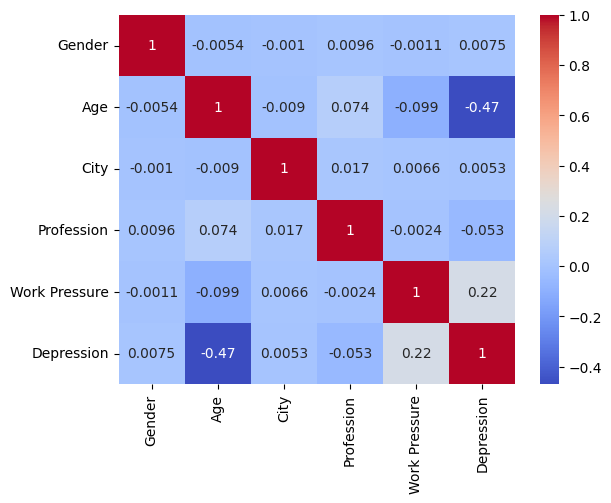

In [ ]:
numeric_cols = [
       'Gender', 'Age', 'City', 'Profession', 'Work Pressure',
        'Depression']
corr = df1[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# for prodessional age is inversely proporation to Depression

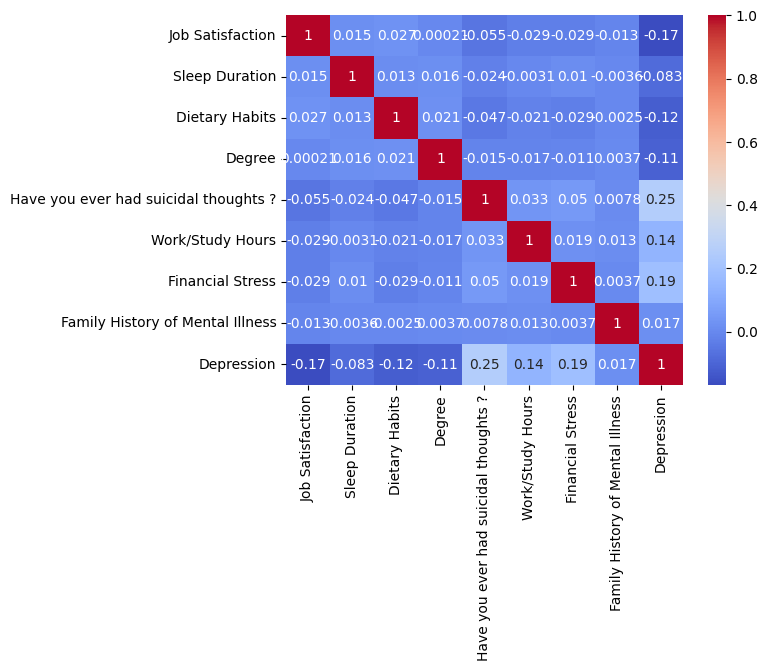

In [ ]:
numeric_cols = [
       'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression']
corr = df1[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# For students

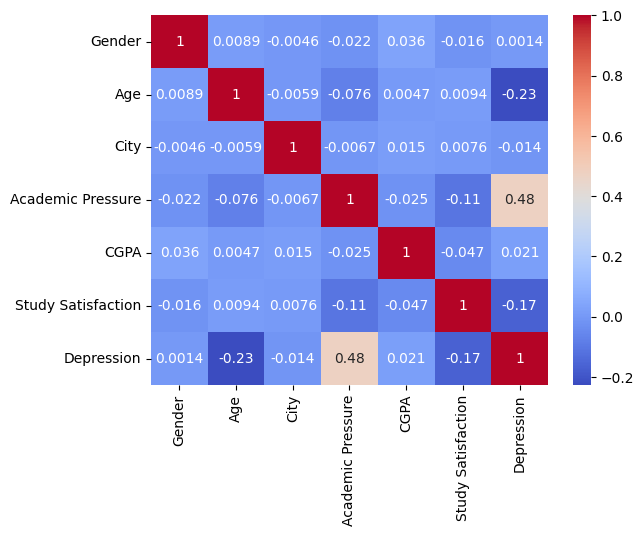

In [ ]:
numeric_cols = [
       'Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction',
        'Depression']
corr = df2[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

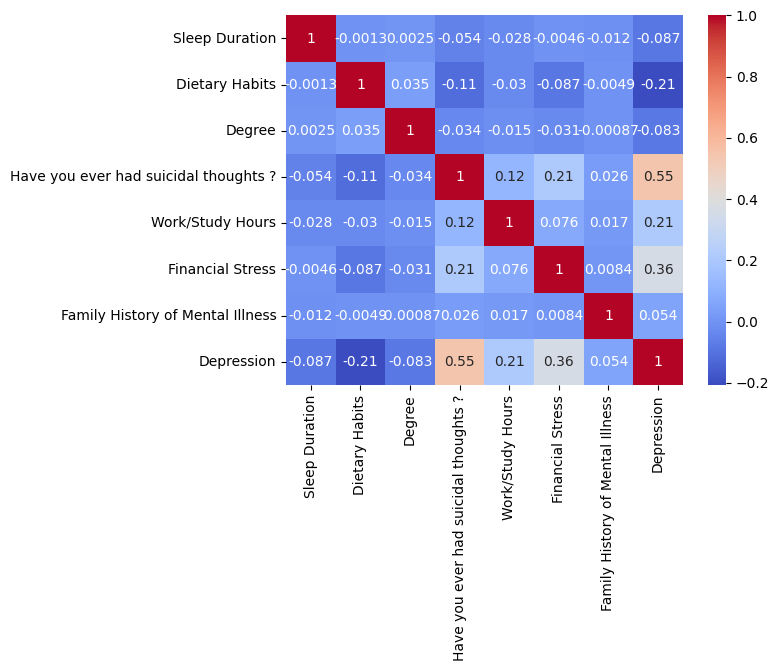

In [ ]:
numeric_cols = [
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression']
corr = df2[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# For Professionals

Training on GPU


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:29:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:29:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


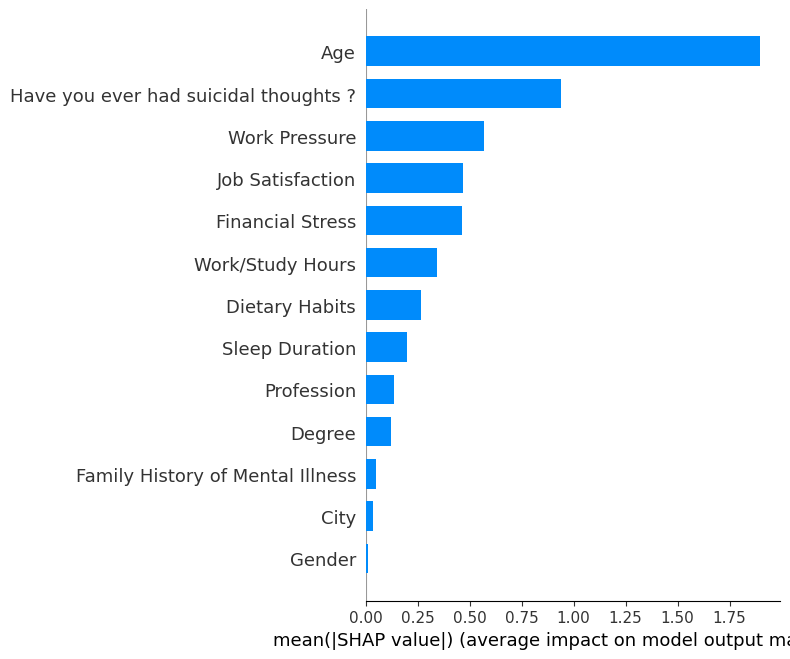

In [ ]:

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import shap

df = df1.copy()
df = df.drop(columns=[c for c in df.columns if "Unnamed" in c])
X = df.drop("Depression", axis=1)
y = df["Depression"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


try:
    import cupy
    model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                          tree_method="gpu_hist", predictor="gpu_predictor",
                          eval_metric="logloss")
    print("Training on GPU") # Inform the user about GPU usage
except ImportError:
    model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                          eval_metric="logloss")  # Fallback to CPU
    print("CUDA/cupy not found, training on CPU") # Inform user about CPU fallback

model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
# For students

Training on GPU


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:30:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:30:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:30:02] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


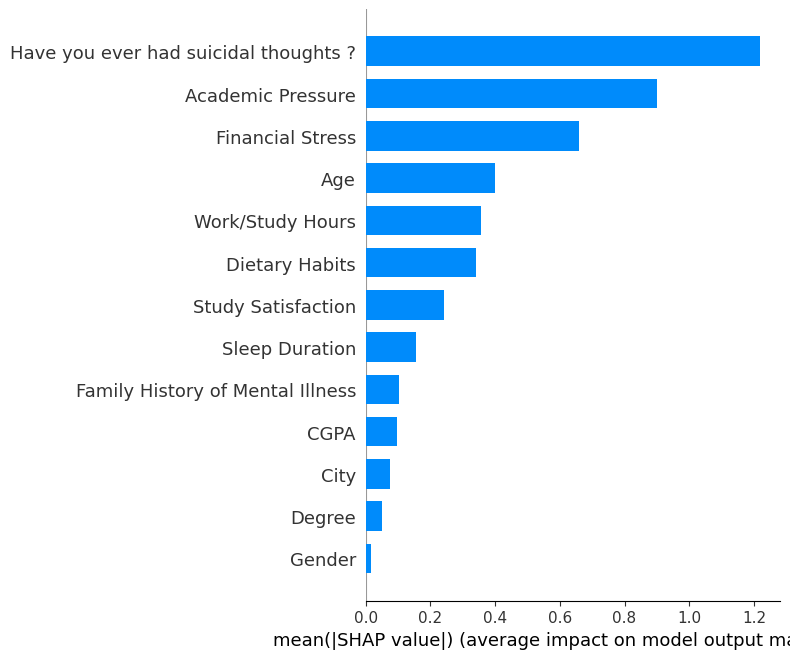

In [ ]:

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import shap

df = df2.copy()
df = df.drop(columns=[c for c in df.columns if "Unnamed" in c])
X = df.drop("Depression", axis=1)
y = df["Depression"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


try:
    import cupy
    model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                          tree_method="gpu_hist", predictor="gpu_predictor",
                          eval_metric="logloss")
    print("Training on GPU") # Inform the user about GPU usage
except ImportError:
    model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                          eval_metric="logloss")  # Fallback to CPU
    print("CUDA/cupy not found, training on CPU") # Inform user about CPU fallback

model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

C:\Users\dell\AppData\Local\Temp\ipykernel_20024\2648833322.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=df1, palette='coolwarm')


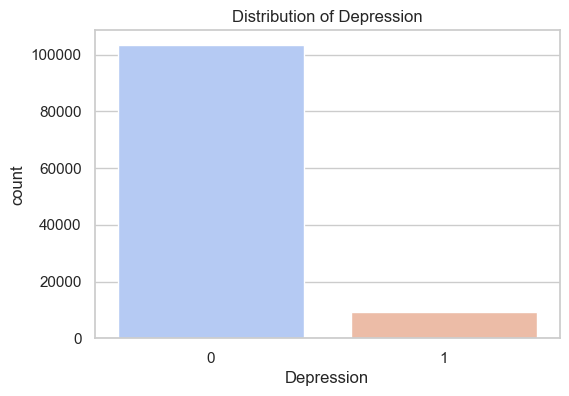

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x='Depression', data=df1, palette='coolwarm')
plt.title("Distribution of Depression")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_20024\1462709188.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=df2, palette='coolwarm')


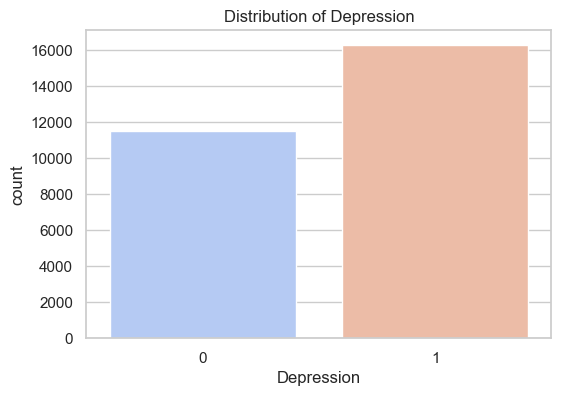

In [19]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x='Depression', data=df2, palette='coolwarm')
plt.title("Distribution of Depression")
plt.show()

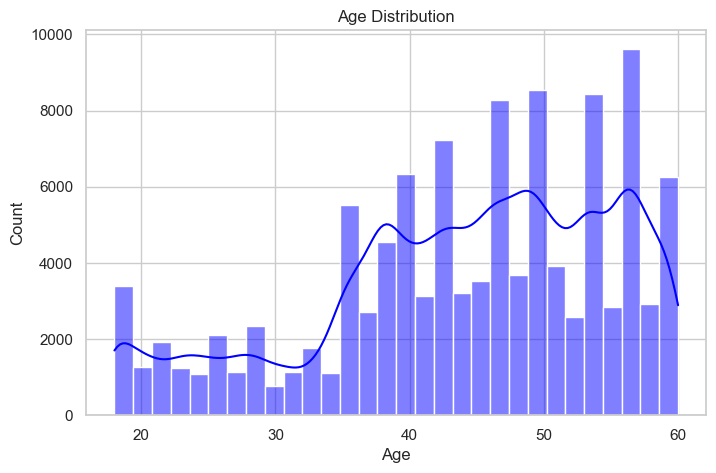

In [20]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df1['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

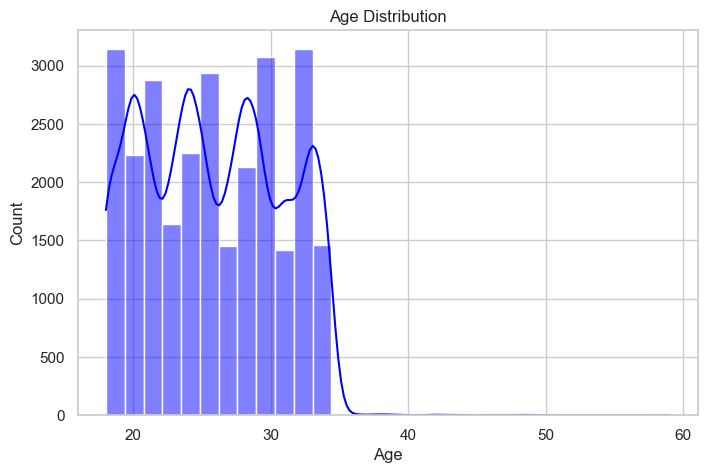

In [21]:
# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df2['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_20024\1583612640.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='CGPA', data=df2, palette='coolwarm')


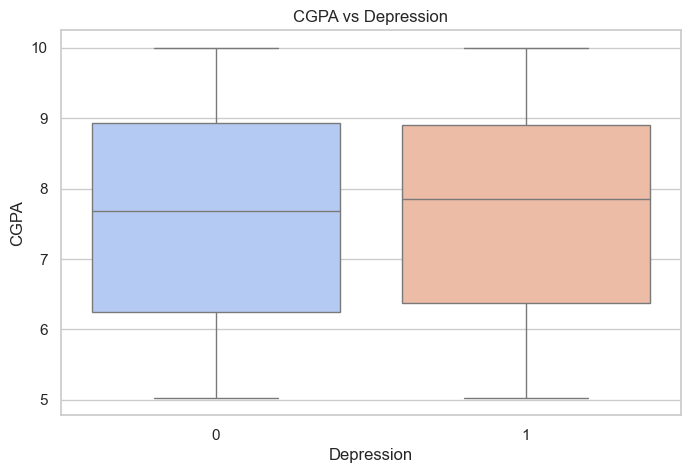

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Depression', y='CGPA', data=df2, palette='coolwarm')
plt.title("CGPA vs Depression")
plt.show()


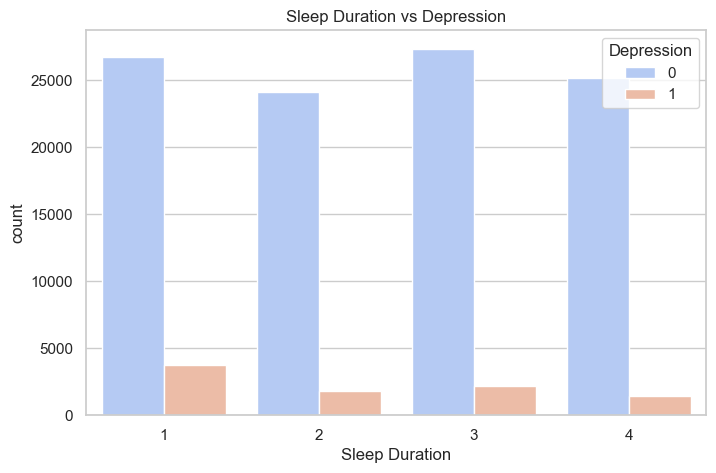

In [23]:
# Count plot for Sleep Duration
plt.figure(figsize=(8,5))
sns.countplot(x='Sleep Duration', hue='Depression', data=df1, palette='coolwarm')
plt.title("Sleep Duration vs Depression")
plt.show()

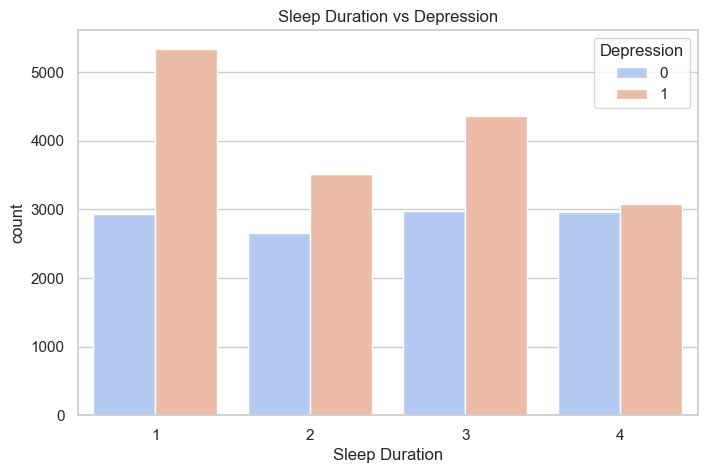

In [24]:
# Count plot for Sleep Duration
plt.figure(figsize=(8,5))
sns.countplot(x='Sleep Duration', hue='Depression', data=df2, palette='coolwarm')
plt.title("Sleep Duration vs Depression")
plt.show()

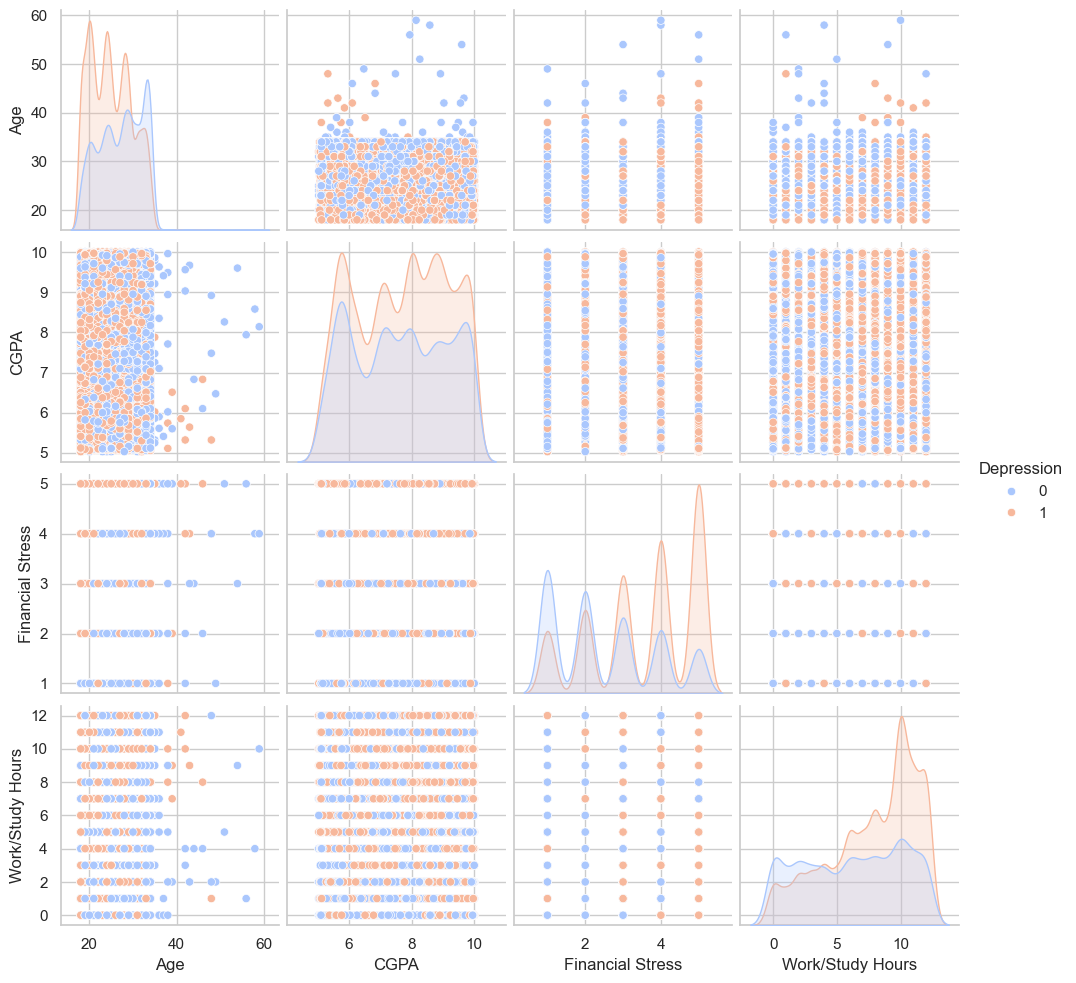

In [25]:
selected_features = ['Age', 'CGPA', 'Financial Stress', 'Work/Study Hours', 'Depression']
sns.pairplot(df2[selected_features], hue='Depression', palette='coolwarm')
plt.show()